    EDA for H and M data set. We will be going through the Kaggle dataset that has 4 csv files and several images file.
    First we will be exploring the csv fileto understand data patterns, identify any issues or anomalies in the data

FILEs
- images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.
- articles.csv - detailed metadata for each article_id available for purchase
- customers.csv - metadata for each customer_id in dataset
- sample_submission.csv - a sample submission file in the correct format
- transactions_train.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# After mounting your Google Drive by running the cell above,
# replace "path/to/your/transactions_train.csv" with the actual path to your file in Google Drive
transactions_df = pd.read_csv('/content/drive/MyDrive/transactions_train.csv')
articles_df = pd.read_csv('articles.csv')
customers_df = pd.read_csv('customers.csv')
display(customers_df.head())

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Let Us first start off with the exploratory data analysis of the file article.csv
This file has total 25 columns
       'article_id', - This is the id for each article. This is the unique identifier for every product even if they are the same.

       'product_code', - This is the product code. Product code of same items are going to be same.
       'prod_name', - This is the name of the product

       'product_type_no', - This is an identifier of the product type but in numerical form
       'product_type_name', - This is going to be the name of the product type. It is related to product_type_no

       'product_group_name', - This is the identifier of which group does product type belong to. its more generic than product type

       'graphical_appearance_no', - this tells how does the product appear, it is put in numerical form
       'graphical_appearance_name', - same as above but in string for,, defines the product graphical appearance

       'colour_group_code',  - codifies the graphical color of the item
       'colour_group_name', - defines what is the color of the item

       'perceived_colour_value_id', - what shade of color is the item (number)
       'perceived_colour_value_name', - what shade of color is the item ( dark, Light, dusty light etc.)

       'perceived_colour_master_id', - what is the percieved color of the item (number)
       'perceived_colour_master_name', - what is the percieved color of the item, combine with perceived_color_value_name

       'department_no', - what department does the item belong to (number)
       department_name',- what department does the item belong to

       'index_code',
       'index_name',

       'index_group_no',
        'index_group_name',

        'section_no',
        'section_name',

       'garment_group_no',
       'garment_group_name',

       'detail_desc' - detail description of the product.

In [4]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
articles_df_T = articles_df.T
articles_df_T.shape

(25, 105542)

In [6]:
articles_df_T['Unique_count'] = articles_df_T.nunique(axis=1)
articles_df_T['Unique_count'].sort_values(ascending=False)

,Unique_count
article_id,105542
product_code,47224
prod_name,45875
detail_desc,43404
department_no,299
department_name,250
product_type_no,132
product_type_name,131
section_no,57
section_name,56


In [7]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [8]:
print(articles_df.dtypes)

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object


Now we are going to explore categortical columns to see how many occurence does each category have?
This will help us understand the things like what is the most popular item, what is the most popular group or department etc.

In [9]:
cat_cols = [x for x in articles_df.columns if articles_df[x].dtype == 'object']
print(cat_cols)
for i in cat_cols:
    print(articles_df[i].value_counts().head(20))
    print("----------------------------------------------------------------")
    print("----------------------------------------------------------------")
    print("----------------------------------------------------------------")
# articles_df['product_type_name'].value_counts()
# print(articles_df['product_group_name'].value_counts())
# print(articles_df['colour_group_name'].value_counts())

['prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_code', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc']
prod_name
Dragonfly dress          98
Mike tee                 72
Wow printed tee 6.99     70
1pk Fun                  55
TP Paddington Sweater    54
Pria tee                 51
Despacito                48
MY                       44
Robin 3pk Fancy          43
DANTE set                42
Eivor 7-p shaftless      42
R-NECK SS SLIM FIT       42
CAMDEN s/s tee TP        41
V-NECK SS SLIM FIT       41
Charlie Top              41
HAPPY TEE TP             41
SBC OWN                  40
PETER POLO               39
James leggings           37
Nora T-shirt             37
Name: count, dtype: int64
----------------------------------------------------------------
-------------------------------------------------

Let us explore Customer data sets.

In [ ]:
customers_df.head(20)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916771 entries, 0 to 916770
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             916771 non-null  object 
 1   FN                      318903 non-null  float64
 2   Active                  310473 non-null  float64
 3   club_member_status      912765 non-null  object 
 4   fashion_news_frequency  905974 non-null  object 
 5   age                     906128 non-null  float64
 6   postal_code             916770 non-null  object 
dtypes: float64(3), object(4)
memory usage: 49.0+ MB


In [10]:
customers_df['FN'] = customers_df['FN'].fillna(0).astype('float64')
customers_df['Active'] = customers_df['Active'].fillna(0).astype('float64')

In [11]:
customers_df['Active'].value_counts()

,count
Active,
0.0,907576
1.0,464404


In [12]:
customers_df['club_member_status'].isna().sum()

np.int64(6062)

In [13]:
customers_df['fashion_news_frequency'].isna().sum()

np.int64(16011)

We have some NaN values in columns but upon inspection we see that for columns 'fashion_news_frequency', 'club_member_status', 'age'
the missing values or NaNs are very less in relation to total number of rows. So, we can go ahead and drop the rows that have NaNs for the above columns.
NOTE: we also had NaNs for columns 'Acitve', 'FN', but the occurance of NaNs in these columns were large in relation to overall data, and the value in these columns are also Nominal type - so we can impute the row with 0.0 for both the columns.

In [14]:
customers_df = customers_df.dropna(subset=['fashion_news_frequency', 'club_member_status', 'age'])

In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338568 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1338568 non-null  object 
 1   FN                      1338568 non-null  float64
 2   Active                  1338568 non-null  float64
 3   club_member_status      1338568 non-null  object 
 4   fashion_news_frequency  1338568 non-null  object 
 5   age                     1338568 non-null  float64
 6   postal_code             1338568 non-null  object 
dtypes: float64(3), object(4)
memory usage: 81.7+ MB


In [16]:
customers_df['postal_code'].nunique()

350675

In [17]:
customers_df.groupby('postal_code').size().sort_values(ascending=False)

,0
postal_code,
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c,114122
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8,260
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1,158
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7,155
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145,155
...,...
861e143f0668e62a99749607b5fbcc12d76dad443011f73e43d4d74476e0d49c,1
861da8c65608f79db86cba49ed22ec2ca087b14f1f8c9a64daeb7acb81cfa8a2,1
ffffd89fe6a23128efcee162ad22b229e0c7e3d9bba5a34aed6a2c481f797ac0,1


In [ ]:
customers_df['age'].describe()

,age
count,1.338568e+06
mean,3.636658e+01
std,1.431043e+01
min,1.600000e+01
25%,2.400000e+01
50%,3.200000e+01
75%,4.900000e+01
max,9.900000e+01


In [ ]:
customers_df['age'].mode()

,age
0,21.0


In [ ]:
customers_df['age'].median()

32.0

In [ ]:
# customers_df.groupby('fashion_news_frequency')['age'].mode()
customers_df.groupby('fashion_news_frequency')['age'].agg(lambda x: x.mode().iloc[0])

,age
fashion_news_frequency,
Monthly,28.0
NONE,21.0
Regularly,21.0


In [ ]:
customers_df.groupby('club_member_status')['age'].agg(lambda x: x.mode().iloc[0])

,age
club_member_status,
ACTIVE,21.0
LEFT CLUB,21.0
PRE-CREATE,26.0


We've got some insights on the age. Looks like most of the people fall towards yonger side as the Mode of the age distribution is 21 and Mean being 36.
We also found out 21 year olds are mot common age group to follow fashion news on a regularly basis.  

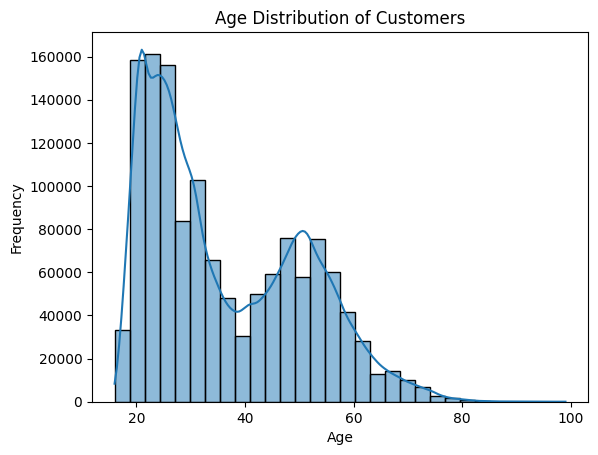

In [ ]:
sns.histplot(customers_df['age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram of age distribution also gives some insight on the beahviour according to the age. we can see that there is massive involvement of young people aged 20-25 and after that the involvment significantly drops until the age of 40. Surprisingly people start to engage in fashion after 40 until approximately 50 years of age. This is interesting insight that shines light on the age factor of the data and in some way behaviour pattern too.

In [ ]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [18]:
# Let us convert the 't_dat' column to datetime format
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'], format='%Y-%m-%d')

In [19]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [20]:
transactions_df['t_dat'].describe()

,t_dat
count,31788324
mean,2019-09-15 17:27:46.894452992
min,2018-09-20 00:00:00
25%,2019-03-28 00:00:00
50%,2019-08-25 00:00:00
75%,2020-03-29 00:00:00
max,2020-09-22 00:00:00


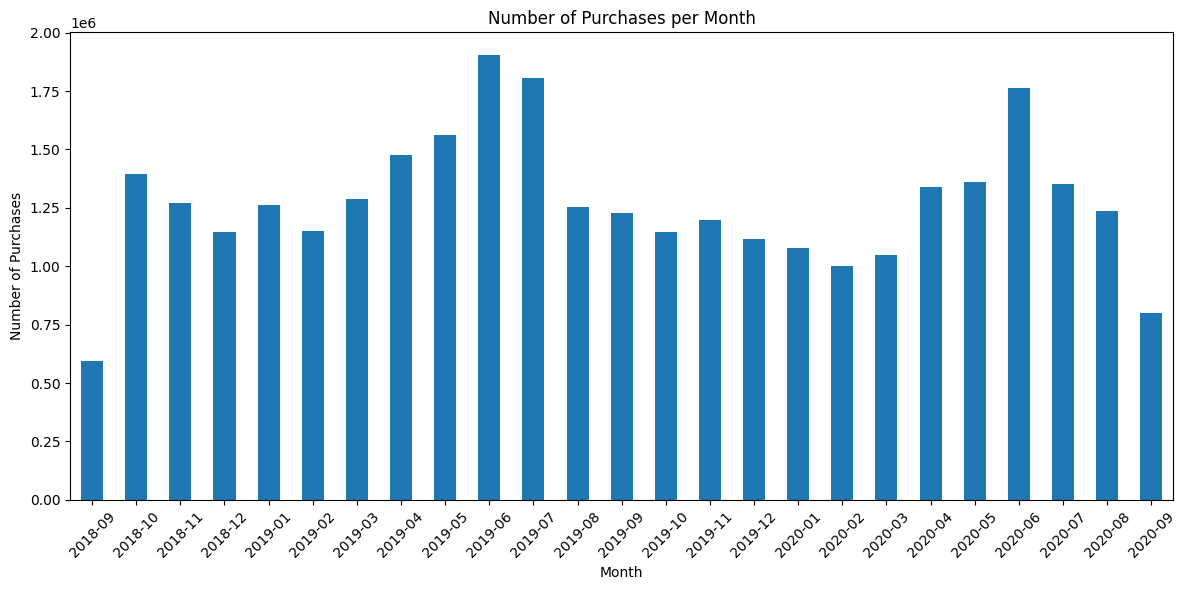

In [22]:
# Create a 'month' column (format: YYYY-MM)
transactions_df['month'] = transactions_df['t_dat'].dt.to_period('M').astype(str)

# Count purchases per month
monthly_counts = transactions_df['month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
monthly_counts.plot(kind='bar')
plt.title('Number of Purchases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Articles popularity per month. What are the top articles sold each month?
top_articles_month = transactions_df.groupby(['month', 'article_id']).size().groupby('month').nlargest(1)
print(top_articles_month)


month    month    article_id
2018-09  2018-09  539723005     1332
2018-10  2018-10  399223001     2931
2018-11  2018-11  562245001     3393
2018-12  2018-12  663986003     2951
2019-01  2019-01  689109001     5709
2019-02  2019-02  706016001     2723
2019-03  2019-03  705988005     2291
2019-04  2019-04  706016002     2236
2019-05  2019-05  720137001     2708
2019-06  2019-06  758064001     4346
2019-07  2019-07  717490008     3196
2019-08  2019-08  799190003     2627
2019-09  2019-09  706016001     3755
2019-10  2019-10  706016001     2802
2019-11  2019-11  706016001     4852
2019-12  2019-12  706016001     2832
2020-01  2020-01  720125001     2628
2020-02  2020-02  866383001     1797
2020-03  2020-03  706016001     2960
2020-04  2020-04  599580055     5154
2020-05  2020-05  684209027     2448
2020-06  2020-06  817472002     2994
2020-07  2020-07  706016001     1999
2020-08  2020-08  916468003     2328
2020-09  2020-09  751471001     1982
dtype: int64


In [24]:
article_sales = transactions_df.groupby('article_id').agg({'price':'mean', 'customer_id':'count'}).reset_index()
print(article_sales.corr())

             article_id     price  customer_id
article_id     1.000000  0.170784    -0.001784
price          0.170784  1.000000    -0.013854
customer_id   -0.001784 -0.013854     1.000000


There doesn't seem to be strong correlation between price and sales volume

Let us join the table to explore the data.

In [25]:
merged_df = transactions_df.merge(customers_df, on ='customer_id', how = 'inner')
merged_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,month,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


Earlier we found that one particular postal code had most transactions. In the below line of code we are trying to see which sales_channel_id does the postal code have and it turns out that the most of tha transactions in that postal code is happening through sales_channel_id 1, althouh we can also see that there is significant amount of transaction happening from sales_channel_id 2.

In [26]:
merged_df.groupby(['postal_code', 'sales_channel_id']).size().sort_values(ascending=False).head(10)

postal_code                                                       sales_channel_id
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c  1                   481204
                                                                  2                   114432
a5ca21aefc3cf90afd9b09faf3b0f8f3c423d4f1cfb4c2e33a1b86770e426fa8  2                     5801
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145  2                     4278
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7  2                     4211
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c  2                     3727
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8  1                     3583
a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd  2                     3530
2790324c84cdb8ba471be2a199cfb5103bbe1ab10883a0312b6928b05d6ee6c4  2                     3499
9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358  2                     3002
dtype: int64

In [32]:
final_merged_df = merged_df.merge(articles_df, on='article_id', how='inner')
final_merged_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,month,FN,Active,club_member_status,fashion_news_frequency,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09,0.0,0.0,ACTIVE,NONE,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09,0.0,0.0,ACTIVE,NONE,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09,1.0,1.0,ACTIVE,Regularly,...,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09,1.0,1.0,ACTIVE,Regularly,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09,1.0,1.0,ACTIVE,Regularly,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...


In [33]:
final_merged_df.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'month', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency',
       'age', 'postal_code', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [34]:
final_columns = ['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'month','postal_code','product_code','prod_name','product_group_name','department_name', 'detail_desc']
final_merged_df = final_merged_df[final_columns]
final_merged_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,month,postal_code,product_code,prod_name,product_group_name,department_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,663713,Atlanta Push Body Harlow,Underwear,Expressive Lingerie,"Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,541518,Rae Push (Melbourne) 2p,Underwear,Casual Lingerie,"Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,505221,Inca Jumper,Garment Upper body,Tops Knitwear DS,Jumper in rib-knit cotton with hard-worn detai...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,685687,W YODA KNIT OL OFFER,Garment Upper body,Campaigns,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,685687,W YODA KNIT OL OFFER,Garment Upper body,Campaigns,V-neck knitted jumper with long sleeves and ri...


# Task
Explain the steps to build a popularity-based recommender model using the `final_merged_df` dataframe.

## Calculate item popularity

### Subtask:
Determine the popularity of each article based on the number of times it has been purchased.


**Reasoning**:
Group the dataframe by article_id and count the occurrences to determine popularity.



In [43]:
article_popularity = final_merged_df.groupby(['postal_code','article_id'])['article_id'].size().reset_index(name='purchase_count')
# Filter for the most purchased article within each postal code
most_purchased_per_postal_code = article_popularity.loc[article_popularity.groupby('postal_code')['purchase_count'].idxmax()]
print("Most purchased article per postal code:")
display(most_purchased_per_postal_code.head(20))

Most purchased article per postal code:


,postal_code,article_id,purchase_count
6,0000198d2c593b7d3df5a35282b74cf3a487b066286b2b...,759871002,2
15,00005652fb5323679a5d608ce8c94fbb57bc15d3d8c01a...,297067002,2
73,0000eda740da878fb9df474806be9597f043eb5f748091...,516903011,1
85,0001617618d0facf2ae73cdba7b8caefb3c05e6987a98a...,608016002,1
143,00016f13cb796865b053cda4d470b4a3146553eaa36241...,736531016,3
193,000194b9b492fe7ddb150ef21f274ea5fa13e52dc1822f...,578487012,1
201,0001af673c87d3631b9437782c0b9dbf411a816be883bb...,617736002,2
286,0001b0310fee78ef28b11d03ff341f1d280eaca029396a...,805308001,3
302,0001e811645d6ba41ea172afe7a815fd0c368efbf5a3d1...,735840004,1
313,0002024a2ff8db343d32ae21728629249b75aa22ad1d25...,468480002,1


## Rank items by popularity

### Subtask:
Sort the articles based on their popularity in descending order.


**Reasoning**:
Sort the articles based on their popularity in descending order and display the head of the sorted dataframe.



In [44]:
ranked_articles = most_purchased_per_postal_code.sort_values(by='purchase_count', ascending=False).reset_index(drop=True)
display(ranked_articles.head())

,postal_code,article_id,purchase_count
0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,372860001,1091
1,ecfb1e6aed8dde7c46c955c26185c51a1c21ca5ad6f819...,678342001,570
2,45a5d77c5dc765f23b4ce8b38f30da63359061f8fb0b09...,629420001,199
3,fce375cd69ffecf89cbc59ce8ee3b69436c86c469adc26...,507909001,188
4,fb96671b90865e421b13cf070fca4501f9a9761375edad...,688558002,167


## Generate recommendations

### Subtask:
For each customer, recommend the top N most popular articles that they have not already purchased.


**Reasoning**:
Define a function to recommend top N articles to a customer based on popularity, excluding already purchased items.



In [46]:
customer_id = final_merged_df['customer_id'].iloc[0]

In [48]:
print(final_merged_df[final_merged_df['customer_id'] == customer_id]['article_id'].unique())

[663713001 541518023 578020002 723529001 351484002 727808001 727808007
 858883002 851400006 750424014 870304002 852643001 852643003 794321007]


In [52]:
def recommend_articles(customer_id, ranked_articles, final_merged_df, most_purchased_per_postal_code, n=10):
    """
    Recommends top N popular articles to a customer, excluding already purchased items,
    prioritizing recommendations based on postal code popularity if available.

    Args:
        customer_id: The ID of the customer.
        ranked_articles: DataFrame with articles ranked by overall popularity.
        final_merged_df: DataFrame containing transaction data.
        most_purchased_per_postal_code: DataFrame with the most purchased article per postal code.
        n: The number of recommendations to provide.

    Returns:
        A list of recommended article IDs.
    """
    # Get articles already purchased by the customer
    purchased_articles = final_merged_df[final_merged_df['customer_id'] == customer_id]['article_id'].unique()

    # Get the customer's postal code, handle cases where customer might not be in the provided dataframe
    customer_data = final_merged_df[final_merged_df['customer_id'] == customer_id]
    if customer_data.empty:
        # If customer not found in the provided dataframe, recommend overall popular items
        filtered_ranked_articles = ranked_articles[~ranked_articles['article_id'].isin(purchased_articles)]
        top_n_recommendations = filtered_ranked_articles.head(n)['article_id'].tolist()
        return top_n_recommendations
    else:
        customer_postal_code = customer_data['postal_code'].iloc[0]


    # Check if the customer's postal code exists in the most_purchased_per_postal_code dataframe
    if customer_postal_code in most_purchased_per_postal_code['postal_code'].unique():
        # If postal code exists, recommend based on postal code popularity
        postal_code_ranked_articles = most_purchased_per_postal_code[
            most_purchased_per_postal_code['postal_code'] == customer_postal_code
        ].sort_values(by='purchase_count', ascending=False)

        # Filter postal code ranked articles to exclude purchased items
        filtered_ranked_articles = postal_code_ranked_articles[~postal_code_ranked_articles['article_id'].isin(purchased_articles)]

        # If not enough recommendations from postal code, fill with overall popular articles
        if len(filtered_ranked_articles) < n:
            overall_ranked_articles = ranked_articles[~ranked_articles['article_id'].isin(purchased_articles)]
            combined_recommendations = pd.concat([filtered_ranked_articles, overall_ranked_articles]).drop_duplicates(subset=['article_id']).head(n)
            top_n_recommendations = combined_recommendations['article_id'].tolist()
        else:
            top_n_recommendations = filtered_ranked_articles.head(n)['article_id'].tolist()

    else:
        # If postal code does not exist, recommend based on overall popularity
        filtered_ranked_articles = ranked_articles[~ranked_articles['article_id'].isin(purchased_articles)]
        top_n_recommendations = filtered_ranked_articles.head(n)['article_id'].tolist()

    return top_n_recommendations

# Example usage (using a sample customer ID for demonstration)
sample_customer_id = final_merged_df['customer_id'].iloc[0]
recommendations = recommend_articles(sample_customer_id, ranked_articles, final_merged_df, most_purchased_per_postal_code, n=10)
print(f"Recommendations for customer {sample_customer_id}: {recommendations}")

Recommendations for customer 000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318: [399201025, 372860001, 678342001, 629420001, 507909001, 688558002, 685347001, 570004009, 179123001, 756322001]


## Evaluate the model

### Subtask:
Evaluate the performance of the popularity-based recommender model.


**Reasoning**:
Define a function to evaluate the model's performance by calculating Precision@N and Recall@N using a holdout set of transaction data.



In [ ]:
from sklearn.model_selection import train_test_split

def evaluate_recommender(final_merged_df, ranked_articles, most_purchased_per_postal_code, n=10, test_size_fraction=0.1):
    """
    Evaluates the performance of the popularity-based recommender model.

    Args:
        final_merged_df: DataFrame containing transaction data with 't_dat', 'customer_id', 'article_id', and 'postal_code'.
        ranked_articles: DataFrame with articles ranked by overall popularity.
        most_purchased_per_postal_code: DataFrame with the most purchased article per postal code.
        n: The number of recommendations to generate.
        test_size_fraction: The fraction of data to use as the test set.

    Returns:
        A dictionary containing evaluation metrics (e.g., Precision@N, Recall@N).
    """
    """
    TODO: I need to use smaller sample training data inorder to complete the training faster.
    """

    # Sort transactions by date to create a chronological split
    transactions_df_sorted = final_merged_df.sort_values(by='t_dat')

    # Determine the split point based on the test_size_fraction
    split_index = int(len(transactions_df_sorted) * (1 - test_size_fraction))

    # Split data into training and test sets
    train_df = transactions_df_sorted.iloc[:split_index]
    test_df = transactions_df_sorted.iloc[split_index:]

    # Get unique customers in the test set
    test_customers = test_df['customer_id'].unique()

    precision_scores = []
    recall_scores = []

    for customer_id in test_customers:
        # Get actual purchased articles for the customer in the test set
        actual_purchases = test_df[test_df['customer_id'] == customer_id]['article_id'].unique()

        if len(actual_purchases) == 0:
            continue # Skip customers with no purchases in the test set

        # Generate recommendations using the updated recommend_articles function
        recommendations = recommend_articles(customer_id, ranked_articles, train_df, most_purchased_per_postal_code, n=n)

        # Calculate hits (recommended items that were actually purchased)
        hits = len(set(recommendations) & set(actual_purchases))

        # Calculate Precision@N
        precision_at_n = hits / n if n > 0 else 0
        precision_scores.append(precision_at_n)

        # Calculate Recall@N
        recall_at_n = hits / len(actual_purchases) if len(actual_purchases) > 0 else 0
        recall_scores.append(recall_at_n)

    # Calculate average precision and recall
    avg_precision = sum(precision_scores) / len(precision_scores) if len(precision_scores) > 0 else 0
    avg_recall = sum(recall_scores) / len(recall_scores) if len(recall_scores) > 0 else 0

    return {"Precision@N": avg_precision, "Recall@N": avg_recall}

# Evaluate the model
evaluation_metrics = evaluate_recommender(final_merged_df, ranked_articles, most_purchased_per_postal_code, n=10, test_size_fraction=0.1)
print(evaluation_metrics)